In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Define the cryptocurrency ticker
crypto_ticker = "ETH-USD"  
start_date = "2020-01-01"  
end_date = "2025-01-01"    

# Fetch historical data
data = yf.download(crypto_ticker, start=start_date, end=end_date, interval="1d")

print(data.head())

data.to_csv("crypto_data.csv")
print("Data saved to crypto_data.csv")

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open       Volume
Ticker         ETH-USD     ETH-USD     ETH-USD     ETH-USD      ETH-USD
Date                                                                   
2020-01-01  130.802002  132.835358  129.198288  129.630661   7935230330
2020-01-02  127.410179  130.820038  126.954910  130.820038   8032709256
2020-01-03  134.171707  134.554016  126.490021  127.411263  10476845358
2020-01-04  135.069366  136.052719  133.040558  134.168518   7430904515
2020-01-05  136.276779  139.410202  135.045624  135.072098   7526675353
Data saved to crypto_data.csv


In [5]:

df = pd.read_csv('ETH-USD.csv')
# df.drop(index=[0,1], inplace=True)
df = df.iloc[2:]


In [6]:
df.head()

,Price,Close,High,Low,Open,Volume
2,2020-01-01,130.802001953125,132.83535766601562,129.1982879638672,129.6306610107422,7935230330
3,2020-01-02,127.4101791381836,130.82003784179688,126.95491027832031,130.82003784179688,8032709256
4,2020-01-03,134.1717071533203,134.55401611328125,126.49002075195312,127.41126251220703,10476845358
5,2020-01-04,135.06936645507812,136.05271911621094,133.04055786132812,134.16851806640625,7430904515
6,2020-01-05,136.2767791748047,139.4102020263672,135.04562377929688,135.0720977783203,7526675353


In [7]:
df.rename(columns={'Price': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

In [8]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,130.802001953125,132.83535766601562,129.1982879638672,129.6306610107422,7935230330
2020-01-02,127.4101791381836,130.82003784179688,126.95491027832031,130.82003784179688,8032709256
2020-01-03,134.1717071533203,134.55401611328125,126.49002075195312,127.41126251220703,10476845358
2020-01-04,135.06936645507812,136.05271911621094,133.04055786132812,134.16851806640625,7430904515
2020-01-05,136.2767791748047,139.4102020263672,135.04562377929688,135.0720977783203,7526675353


In [9]:
df[['Close','Open','Low','High','Volume']] = df[['Close','Open','Low','High','Volume']].astype('float')

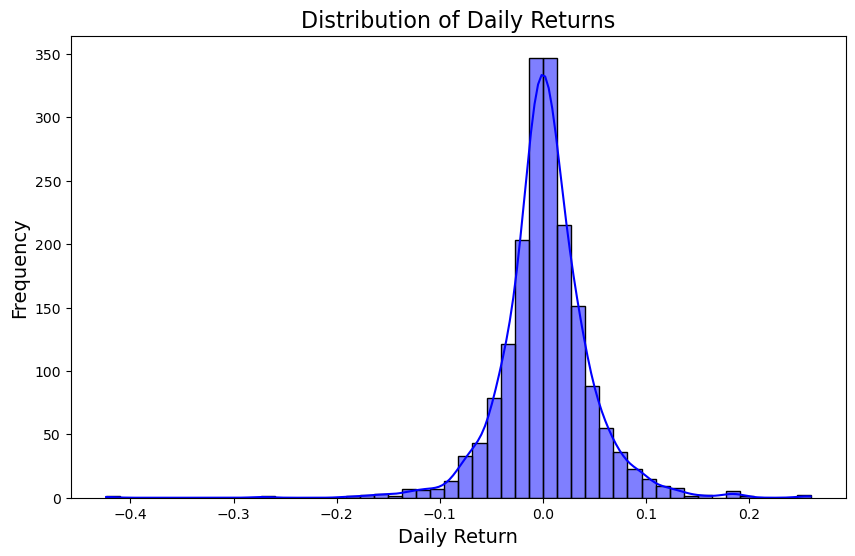

In [11]:
df['Daily Return'] = df['Close'].pct_change() #percentage change 

#analysing daily returns
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), kde=True, bins=50, color='blue')
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()